# Trabalhando com Planilhas de Excel

In [108]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Loading the data
df_1 = pd.read_excel('../datasets/Aracaju.xlsx')
df_2 = pd.read_excel('../datasets/Fortaleza.xlsx')
df_3 = pd.read_excel('../datasets/Natal.xlsx')
df_4 = pd.read_excel('../datasets/Recife.xlsx')
df_5 = pd.read_excel('../datasets/Salvador.xlsx')

In [36]:
df_1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [37]:
df_2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [38]:
df_3.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [39]:
df_4.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5
3,Recife,2019-02-10,160.54,981,3
4,Recife,2019-02-14,19.89,983,7


In [40]:
df_5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [41]:
# Concatenation of the datasets into a single DataFrame
df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [42]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [43]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [44]:
# Sampling our DataFrame
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
94,Recife,2019-01-01,24.70,982,3
160,Salvador,2019-01-02,11.76,1034,1
72,Natal,2018-05-02,612.00,854,4
81,Natal,2019-04-02,564.00,854,2
173,Natal,2019-01-02,31.77,1034,2


In [45]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [46]:
# Changing the type of LojaID column
df.LojaID = df.LojaID.astype("object")

In [47]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Tratando valores nulos

In [48]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Caso tivéssemos dados faltantes em Vendas, por exemplo,substituir tais valores usando o método `fillna()`:

* poderíamos pela média:
```python
df.Vendas.fillna(df.Vendas.mean(), inplace=True)
```

* substituir por zero:
```python
df.Vendas.fillna(0, inplace=True)
```

Também poderíamos "*dropar*" as linhas com dados faltantes usando o método `dropna()`:

* todas as linhas que tiverem ao menos um valor faltante:
```python
df.dropna(inplace=True)
```

* linhas que tiverem um campo específico faltante (por exemplo `Vendas`):
```python
df.dropna(subset=['Vendas'], inplace=True)
```

* linhas com todas as entradas faltantes:
```python
df.dropna(how='all', inplace=True)
```


## Criando colunas

In [49]:
df['Receita'] = df.Vendas.mul(df.Qtde)
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [50]:
## Another way to perform multiplication:
df["Receita2"] = df.Vendas * df.Qtde

In [51]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita2
0,Aracaju,2018-01-01,142.00,1520,1,142.00,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08,196.08


In [52]:
## Erasing (or "dropping") columns
df.drop('Receita2', axis=1, inplace=True)

## Getting familiar with the dataset

In [53]:
## Returns the three largest revenue
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [54]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [55]:
## Max. revenue
df.Receita.max()

3544.0

In [56]:
## Min. revenue
df.Receita.min()

3.34

In [57]:
df.Receita.mean()

387.4977404921702

In [58]:
df.groupby('Cidade').Receita.sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [59]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## The `datetime` type

Most of the time, fields that hold time (day, month, year, etc.) information comes in a data type not suitable for analysis. It is common to get those fields as text or even as integers. Let's change the datatype of the column *"Data"* (that means "date" in portuguese) to these types to practice the datatype conversion.

In [60]:
## Original dataset
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55


In [69]:
## Change to integer
df['Data'] = df.Data.astype('int64') 

In [70]:
## Verifying the changes
print(df.head(3),end='\n\n')
print(df.dtypes)

    Cidade                 Data  Vendas LojaID  Qtde  Receita
0  Aracaju  1514764800000000000  142.00   1520     1   142.00
1  Aracaju  1514764800000000000   14.21   1522     6    85.26
2  Aracaju  1514764800000000000   71.55   1520     1    71.55

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object


In [71]:
## Changing the type back to datetime:
df['Data'] = pd.to_datetime(df.Data)

In [72]:
print(df.head(3),end='\n\n')
print(df.dtypes)

    Cidade       Data  Vendas LojaID  Qtde  Receita
0  Aracaju 2018-01-01  142.00   1520     1   142.00
1  Aracaju 2018-01-01   14.21   1522     6    85.26
2  Aracaju 2018-01-01   71.55   1520     1    71.55

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object


In [73]:
df.groupby(df.Data.dt.year).sum()

,Vendas,Qtde,Receita
Data,,,
2018,31456.67,775,118176.53
2019,78158.28,2141,228246.45


In [78]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [79]:
df['Ano_Venda'] = df['Data'].dt.year

In [80]:
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018


In [81]:
df['Mes_Venda'], df['Dia_venda'] = df['Data'].dt.month, df['Data'].dt.day

In [82]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda
203,Salvador,2019-01-02,37.75,1035,2,75.50,2019,1,2
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,2018,1,1
99,Recife,2019-01-01,136.72,980,4,546.88,2019,1,1
93,Fortaleza,2019-01-01,35.25,1003,5,176.25,2019,1,1
74,Salvador,2019-01-01,170.53,1035,2,341.06,2019,1,1


In [99]:
## Some common queries/operations with dates:
print('First date = ', df['Data'].min())
print('Last date = ', df['Data'].max(), end='\n\n')

df['Diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

First date =  2018-01-01 00:00:00
Last date =  2019-04-05 00:00:00



,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_dias,Trimestre
55,Aracaju,2018-01-01,67.23,1520,8,537.84,2018,1,1,0 days,1
72,Fortaleza,2019-01-01,106.72,1003,4,426.88,2019,1,1,365 days,1
213,Salvador,2019-01-02,42.12,1035,1,42.12,2019,1,2,366 days,1
61,Fortaleza,2019-01-01,37.41,1002,5,187.05,2019,1,1,365 days,1
65,Salvador,2019-01-01,3.39,1034,2,6.78,2019,1,1,365 days,1


In [87]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_dias
125,Natal,2019-01-02,25.00,1037,2,50.00,2019,1,2,366 days
37,Salvador,2019-01-01,18.31,1036,3,54.93,2019,1,1,365 days
20,Recife,2019-01-01,42.35,982,3,127.05,2019,1,1,365 days
64,Recife,2019-01-01,89.32,983,2,178.64,2019,1,1,365 days
40,Natal,2018-01-10,885.00,853,3,2655.00,2018,1,10,9 days


In [88]:
## Quarters of the year (trimestre)
df['Trimestre'] = df['Data'].dt.quarter

In [93]:
df.groupby(df.Trimestre).Receita.sum()

Trimestre
1    293494.98
2     29648.00
3     11658.00
4     11622.00
Name: Receita, dtype: float64

In [95]:
## Filter by date
vendas_marco_2019 = df.loc[(df.Data.dt.year == 2019) & (df.Data.dt.month == 3)]
vendas_marco_2019.sample(20)

## Data visualization

In [100]:
df.LojaID.value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

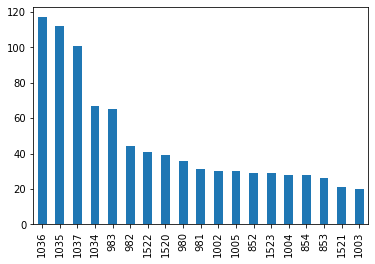

In [104]:
df.LojaID.value_counts(ascending=False).plot.bar();

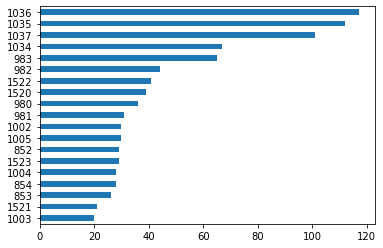

In [105]:
df.LojaID.value_counts(ascending=True).plot.barh();

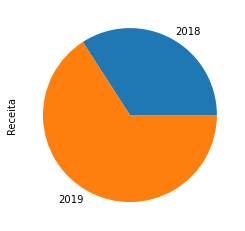

In [107]:
df.groupby(df.Data.dt.year).Receita.sum().plot.pie();

Text(0, 0.5, 'Total de Vendas')

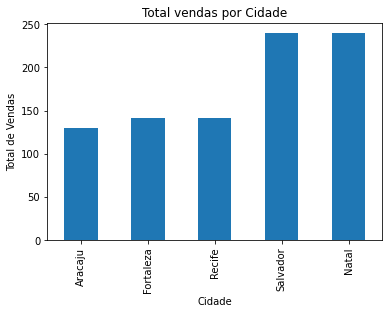

In [110]:
df.Cidade.value_counts(ascending=True).plot.bar(title='Total vendas por Cidade');
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

Text(0, 0.5, 'Total de Vendas')

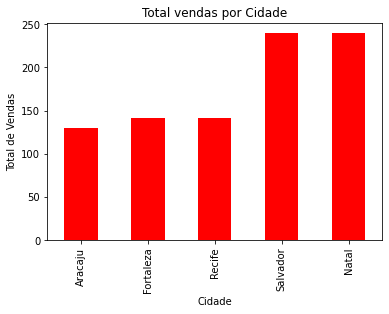

In [111]:
df.Cidade.value_counts(ascending=True).plot.bar(title='Total vendas por Cidade', color='red');
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

In [112]:
plt.style.use('ggplot')

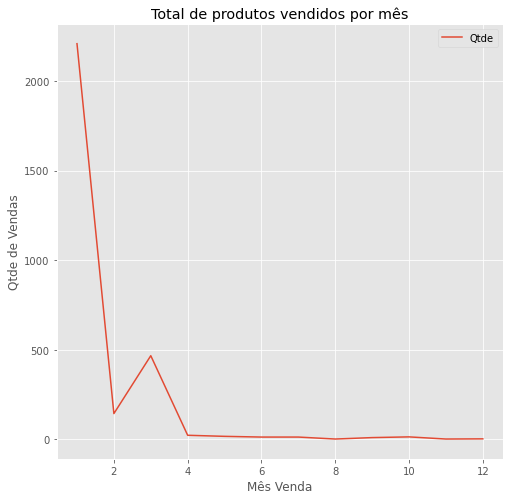

In [118]:
df.groupby(df.Mes_Venda).Qtde.sum().plot.line(figsize=(8,8), title='Total de produtos vendidos por mês');
plt.xlabel('Mês Venda')
plt.ylabel('Qtde de Vendas')
plt.legend();

In [119]:
df_2019 = df[df.Ano_Venda == 2019]

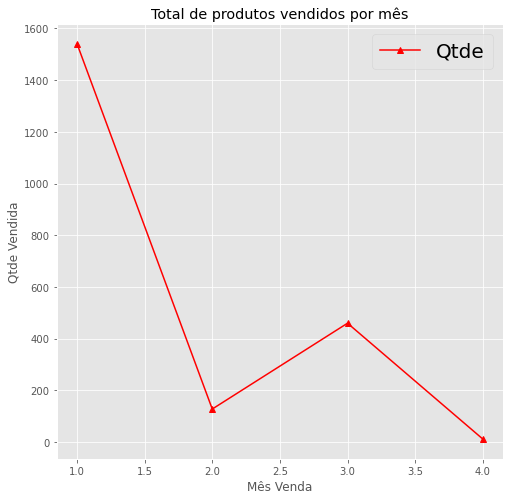

In [125]:
df_2019.groupby(df_2019.Mes_Venda).Qtde.sum().plot(marker='^', color='red', figsize=(8,8),
                                                   title='Total de produtos vendidos por mês');
plt.ylabel('Qtde Vendida')
plt.xlabel('Mês Venda')
plt.legend(fontsize=20);

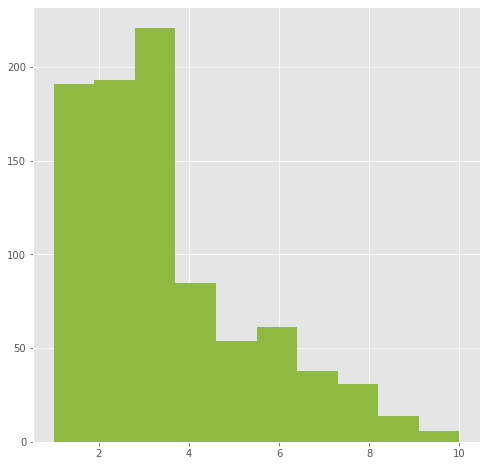

In [129]:
plt.figure(figsize=(8,8))
plt.hist(df.Qtde, color='C5');

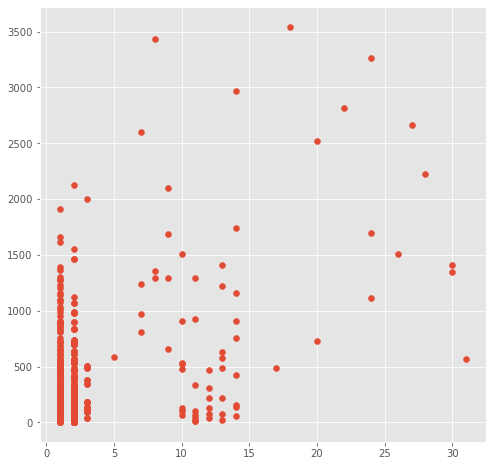

In [132]:
plt.figure(figsize=(8,8))
plt.scatter(x=df_2019.Dia_venda, y=df_2019.Receita);

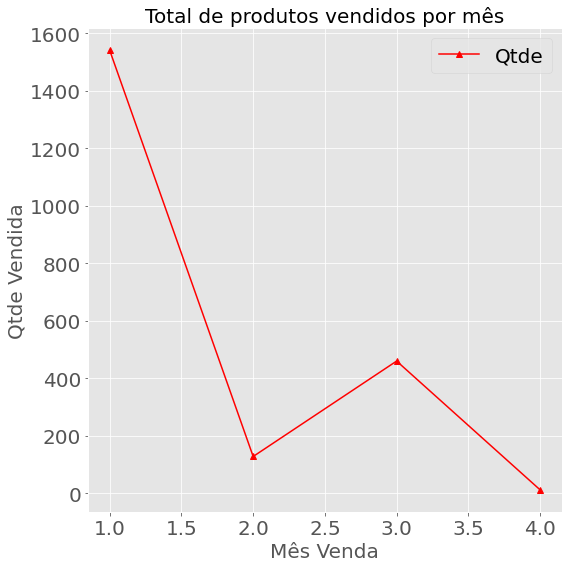

In [139]:
df_2019.groupby(df_2019.Mes_Venda).Qtde.sum().plot(marker='^', color='red', figsize=(8,8), fontsize=20);
plt.title('Total de produtos vendidos por mês', fontsize=20)
plt.ylabel('Qtde Vendida', fontsize=20)
plt.xlabel('Mês Venda', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
# plt.savefig('quantidade_vendida_por_mes_2019.png'); # to save the figure uncomment this line